<a href="https://colab.research.google.com/github/rocket0l4/ML-files/blob/main/DT_with_row_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [7]:
X,y = make_classification(n_features = 5,n_redundant = 0,n_informative = 5,n_clusters_per_class=1)

In [8]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.764939,-0.460584,-1.218428,-0.962947,-0.006182,1
1,1.459576,3.015983,2.786748,-2.708182,0.274242,0
2,0.831497,-1.104176,-0.750039,-1.273858,-1.363275,1
3,-0.021678,-0.350153,-1.291210,-2.865064,-1.617276,1
4,2.097115,-0.423630,-1.489691,0.823871,-0.220231,1


In [9]:
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [51]:
def sample_feature(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*df.shape[1]))
  return df[cols]

In [11]:
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [13]:
df1 = sample_rows(df,0.2)

In [14]:
df2 = sample_rows(df,0.2)

In [16]:
df3 = sample_rows(df,0.2)

In [19]:
df1.shape

(20, 6)

In [21]:
df2.shape

(20, 6)

In [22]:
df3.shape

(20, 6)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [39]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df1.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df1.iloc[:,-1])

DecisionTreeClassifier()

In [40]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[2] <= -1.05\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= -0.97\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]')]

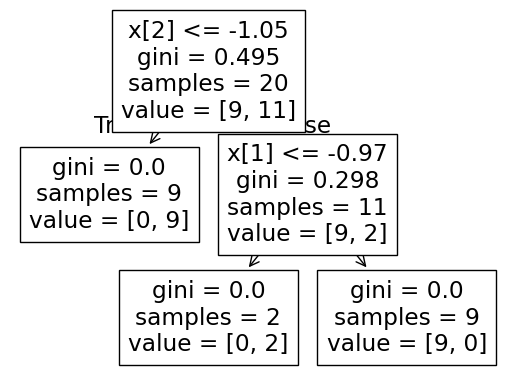

In [41]:
plot_tree(clf1)

[Text(0.4, 0.9, 'x[1] <= -0.676\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.2, 0.7, 'x[3] <= -2.159\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.30000000000000004, 0.8, 'True  '),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6, 0.7, 'x[3] <= -2.823\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.5, 0.8, '  False'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7, 0.5, 'x[2] <= -1.009\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.3, 'x[0] <= 2.743\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.9, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]')]

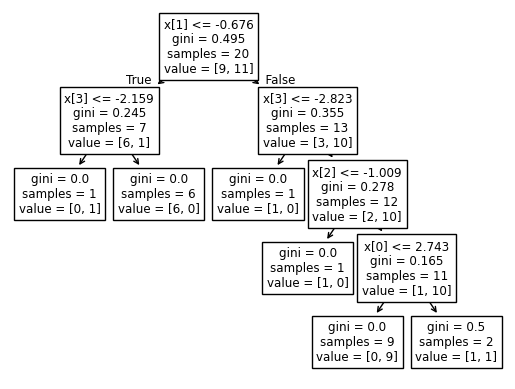

In [42]:
plot_tree(clf2)

[Text(0.375, 0.9166666666666666, 'x[1] <= -0.984\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.16666666666666666, 0.75, 'x[2] <= -2.052\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2708333333333333, 0.8333333333333333, 'True  '),
 Text(0.08333333333333333, 0.5833333333333334, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5833333333333334, 0.75, 'x[2] <= 0.753\ngini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(0.4791666666666667, 0.8333333333333333, '  False'),
 Text(0.4166666666666667, 0.5833333333333334, 'x[4] <= -0.058\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.5, 0.4166666666666667, 'x[4] <= 1.923\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.4166666666666667, 0.25, 'x[2] <= -1.914\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.08333333333333333, '

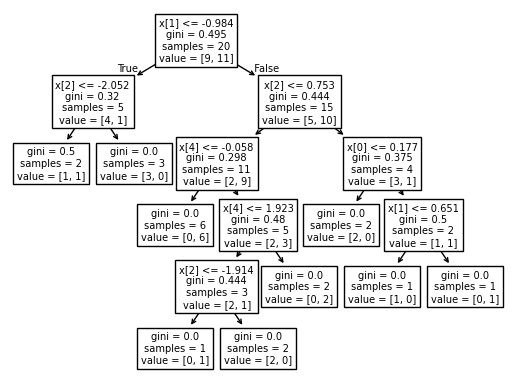

In [43]:
plot_tree(clf3)

In [47]:
clf1.predict(np.array([2.097115, -0.423630, -1.489691, 0.823871, -0.220231]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [48]:
clf2.predict(np.array([2.097115, -0.423630, -1.489691, 0.823871, -0.220231]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [49]:
clf3.predict(np.array([2.097115, -0.423630, -1.489691, 0.823871, -0.220231]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])